# Estatísticas de temperatura, batimento e pressão

Leitura de dados

In [5]:
import matplotlib.pyplot as plt
import csv

dados: list[any]  =  []
path  =  "data_files/sinaisvitais003 100dias DV2 RAxxx9.txt"

with open(path,'r',newline = '') as arquivo:
    d  =  csv.reader(arquivo)
    dd = list(d)

    for i in range(0,len(dd)):
        p = dd[i][0]  
        palavras = p.split("\t")
        dados.append({"HORA":palavras[0],"BATIMENTO":palavras[1],"PRESSAO":palavras[2],"TEMPERATURA":palavras[3]})


[{'HORA': '0',
  'BATIMENTO': '66.53589838486225',
  'PRESSAO': '10.267949192431123',
  'TEMPERATURA': '36.96982744929046'},
 {'HORA': '1',
  'BATIMENTO': '66.93582222752408',
  'PRESSAO': '10.467911113762044',
  'TEMPERATURA': '36.55006243278917'},
 {'HORA': '2',
  'BATIMENTO': '67.42884956125384',
  'PRESSAO': '10.71442478062692',
  'TEMPERATURA': '36.62161698680006'},
 {'HORA': '3',
  'BATIMENTO': '68.0',
  'PRESSAO': '11.0',
  'TEMPERATURA': '36.82858835922455'},
 {'HORA': '4',
  'BATIMENTO': '68.63191942669732',
  'PRESSAO': '11.315959713348663',
  'TEMPERATURA': '36.59502111437028'},
 {'HORA': '5',
  'BATIMENTO': '69.30540728933228',
  'PRESSAO': '11.65270364466614',
  'TEMPERATURA': '36.94991488201229'},
 {'HORA': '6',
  'BATIMENTO': '70.0',
  'PRESSAO': '12.0',
  'TEMPERATURA': '36.666666666666664'},
 {'HORA': '7',
  'BATIMENTO': '70.69459271066772',
  'PRESSAO': '12.34729635533386',
  'TEMPERATURA': '36.723123536117946'},
 {'HORA': '8',
  'BATIMENTO': '71.36808057330268',
  'P

Separação de campos para análise.

In [10]:
hora: list[int] = []
batimento: list[float] = []
pressao: list[float] = []
temperatura: list[float] = []

for i in range(0,len(dados)):
    hora.append(dados[i]["HORA"])
    batimento.append(float(dados[i]["BATIMENTO"]))
    pressao.append(float(dados[i]["PRESSAO"]))
    temperatura.append(float(dados[i]["TEMPERATURA"]))

Função para calcular média entre dois números reais.

In [12]:
def media(v1: float, v2: float) -> float:
  return (v1 + v2)/2

Pré-processamento: eliminação de dados espúrios (fora de domínio realista).

In [13]:
for i in range(1,len(dados)-1):
    if (batimento[i] < 0) or (batimento[i] > 200): batimento[i] = media(batimento[i-1],batimento[i + 1])
    if (pressao[i] < 0) or (pressao[i] > 25): pressao[i] = media(pressao[i-1],pressao[i + 1])
    if (temperatura[i] < 0) or (temperatura[i] > 50): temperatura[i] = media(temperatura[i-1],temperatura[i + 1])

Cálculos estatísticos.

In [14]:
somaBatimento: float = 0
mediaBatimento: float = 0
maxBatimento: float = -100
minBatimento: float = 100000

somaPressao: float = 0
mediaPressao: float = 0
maxPressao: float = -100
minPressao: float = 100000

somaTemperatura: float = 0
mediaTemperatura: float = 0
maxTemperatura: float = -100
minTemperatura: float = 100000

histoBatimento: list[float] = [0] * 200
histoPressao: list[float] = [0] * 25
histoTemperatura: list[float] = [0] * 50

for i in range(0,100):
    histoBatimento.append(0)
    histoPressao.append(0)
    histoTemperatura.append(0)

for i in range(0,len(dados)):
  somaBatimento = somaBatimento + float(batimento[i])
  somaPressao = somaPressao + float(pressao[i])
  somaTemperatura = somaTemperatura + float(temperatura[i])
  
  if (float(batimento[i]) > maxBatimento): maxBatimento = float(batimento[i])
  if (float(pressao[i]) > maxPressao): maxPressao = float(pressao[i])
  if (float(temperatura[i]) > maxTemperatura): maxTemperatura = float(temperatura[i])
      
  if (float(batimento[i]) < minBatimento): minBatimento = float(batimento[i])
  if (float(pressao[i]) < minPressao): minPressao = float(pressao[i])
  if (float(temperatura[i]) < minTemperatura): minTemperatura = float(temperatura[i])
      
  histoBatimento[int(batimento[i])] += 1
  histoPressao[int(pressao[i])] += 1
  histoTemperatura[int(temperatura[i])] += 1
      
mediaBatimento = somaBatimento/len(dados)
mediaPressao = somaPressao/len(dados)
mediaTemperatura = somaTemperatura/len(dados)

print("**********************************")
print("TAMANHO DA AMOSTRA  =  ",len(dados))
print(" ")
print("BATIMENTO MÉDIO  = ",mediaBatimento)
print("BATIMENTO MÁXIMO  = ",maxBatimento)
print("BATIMENTO MÍNIMO  = ",minBatimento)
print(" ")
print("PRESSAO MÉDIA  = ",mediaPressao)
print("PRESSAO MÁXIMA  = ",maxPressao)
print("PRESSAO MÍNIMA  = ",minPressao)
print(" ")
print("TEMPERATURA MÉDIA  = ",mediaTemperatura)
print("TEMPERATURA MÁXIMA  = ",maxTemperatura)
print("TEMPERATURA MÍNIMA  = ",minTemperatura)

**********************************
TAMANHO DA AMOSTRA  =   2400
 
BATIMENTO MÉDIO  =  70.15073495121466
BATIMENTO MÁXIMO  =  102.62830708888889
BATIMENTO MÍNIMO  =  61.72765683787716
 
PRESSAO MÉDIA  =  12.20216379017059
PRESSAO MÁXIMA  =  23.846752545629197
PRESSAO MÍNIMA  =  8.595849701444763
 
TEMPERATURA MÉDIA  =  36.89331689495465
TEMPERATURA MÁXIMA  =  42.77556537865085
TEMPERATURA MÍNIMA  =  36.45642248772086


Histogramas das métricas (batimento cardíaco, pressão arterial e temperatura):

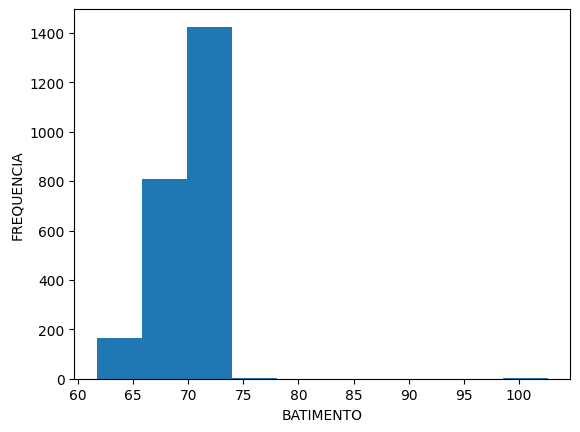

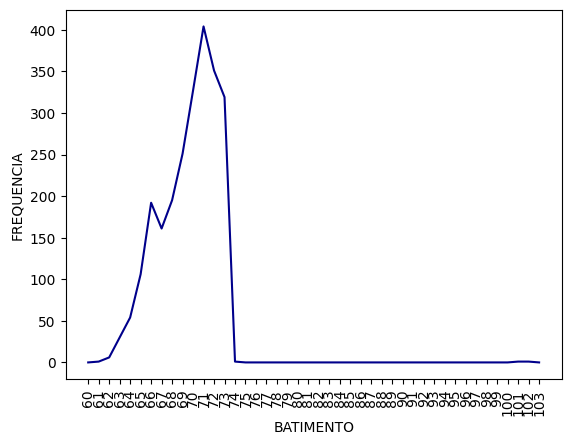

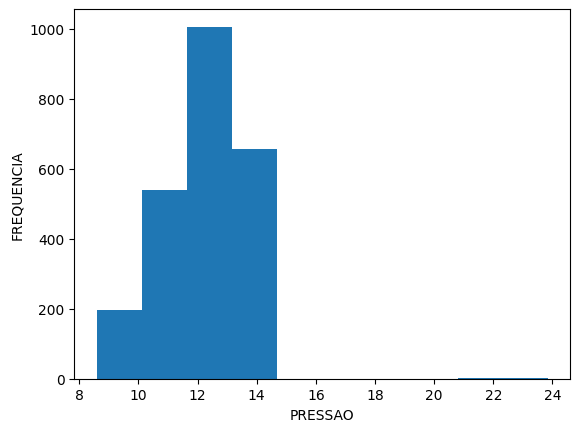

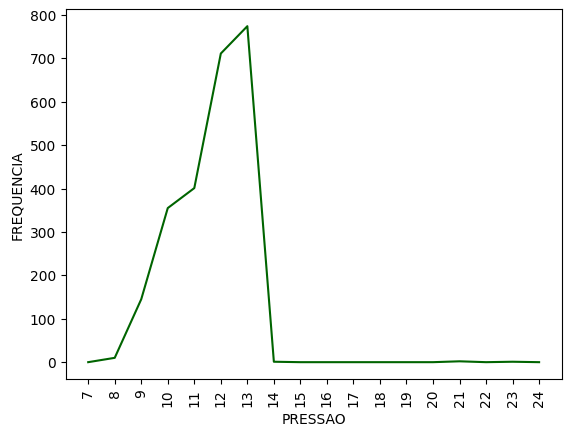

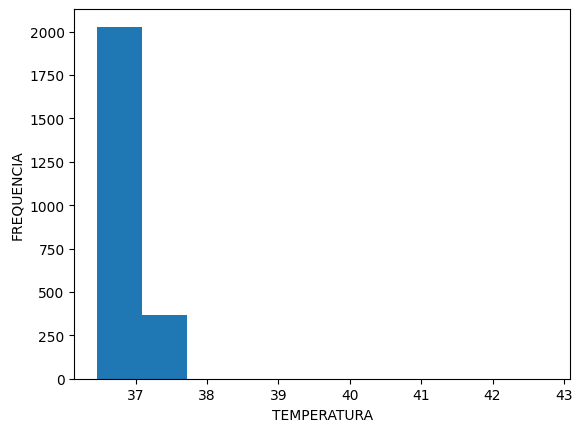

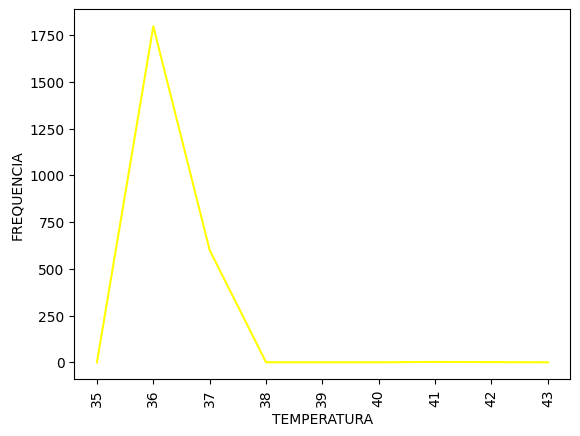

In [15]:
import numpy as np

#HISTOGRAMA BATIMENTO CARDIACO
plt.hist(batimento)
plt.xlabel("BATIMENTO")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(histoBatimento[int(minBatimento)-1:int(maxBatimento) + 2],color = 'darkblue')
xb = np.arange(int(minBatimento)-1,int(maxBatimento) + 2)
xb1 = np.arange(0,len(xb))
plt.xticks(xb1,xb,rotation = 'vertical')
plt.xlabel("BATIMENTO")
plt.ylabel("FREQUENCIA")
plt.show()

#HISTOGRAMA PRESSAO ARTERIAL
plt.hist(pressao)
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(histoPressao[int(minPressao)-1:int(maxPressao) + 2],color = 'darkgreen')
xp = np.arange(int(minPressao)-1,int(maxPressao) + 2)
xp1 = np.arange(0,len(xp))
plt.xticks(xp1,xp,rotation = 'vertical')
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

#HISTOGRAMA TEMPERATURA
plt.hist(temperatura)
plt.xlabel("TEMPERATURA")
plt.ylabel("FREQUENCIA")
plt.show()

tp = histoTemperatura[int(minTemperatura)-1:int(maxTemperatura) + 2]
plt.plot(tp,color = 'yellow')
xt = np.arange(int(minTemperatura)-1,int(maxTemperatura) + 2)
xt1 = np.arange(0,len(xt))
plt.xticks(xt1,xt,rotation = 'vertical')
plt.xlabel("TEMPERATURA")
plt.ylabel("FREQUENCIA")
plt.show()

Correlação entre as três métricas:

In [17]:
import pandas as pd

print("\n\n*************************************************")
print("DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS")
print("*************************************************")

auxDF=[]
# z VARIAVEL AUXILIAR PARA MONTAGEM DO DATAFRAME
auxDF+=[(float(float(dados[j]["BATIMENTO"])),float(dados[j]["PRESSAO"]),float(dados[j]["TEMPERATURA"])) for j in range(0,len(dados))]
DataFrame=[]
# MONTAGEM
DataFrame = pd.DataFrame(auxDF,columns=["BATIMENTO", "PRESSAO","TEMPERATURA"])
print(DataFrame.corr())    

print("\n*************************************************")
print("DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS")
print("*************************************************")
# DADOS ESTATISTICOS
print(DataFrame.describe())



*************************************************
DADOS DE CORRELAÇÃO ENTRE OS TRÊS PARÂMETROS
*************************************************
             BATIMENTO   PRESSAO  TEMPERATURA
BATIMENTO     1.000000  0.836095     0.294780
PRESSAO       0.836095  1.000000     0.318981
TEMPERATURA   0.294780  0.318981     1.000000

*************************************************
DADOS ESTATÍSTICOS DOS TRÊS PARÂMETROS
*************************************************
         BATIMENTO      PRESSAO  TEMPERATURA
count  2400.000000  2400.000000  2400.000000
mean     70.150735    12.202164    36.893317
std       2.761597     1.302759     0.273111
min      61.727657     8.595850    36.456422
25%      68.338606    11.281499    36.739446
50%      70.631939    12.473784    36.893939
75%      72.238005    13.231958    37.001694
max     102.628307    23.846753    42.775565
